In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os 
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn import metrics


%matplotlib inline

In [29]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [30]:
train_df['SalePrice'].describe()
mean = train_df['SalePrice'].mean()

<AxesSubplot:xlabel='SalePrice'>

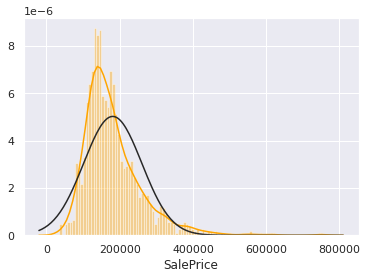

In [31]:
sns.distplot(train_df['SalePrice'], fit = norm, color='orange', bins=100, hist_kws={'alpha': 0.4})

<AxesSubplot:>

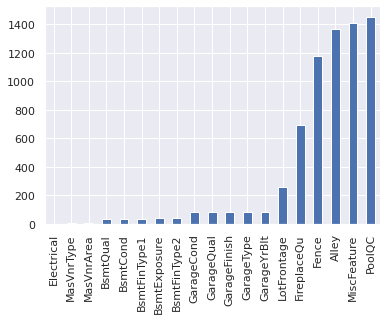

In [32]:
missing = train_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [33]:
replace_na_none_list = ['PoolQC', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtCond', 'BsmtQual'] 
for feature in replace_na_none_list:
    train_df[feature] = train_df[feature].fillna("None")

In [34]:
## replace na with average 
train_df["LotFrontage"] = train_df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
# MasVnrArea
train_df["MasVnrArea"] = train_df["MasVnrArea"].fillna(train_df["MasVnrArea"].mean())
train_df["GarageYrBlt"] = train_df["GarageYrBlt"].fillna(train_df["GarageYrBlt"].mean())

<AxesSubplot:>

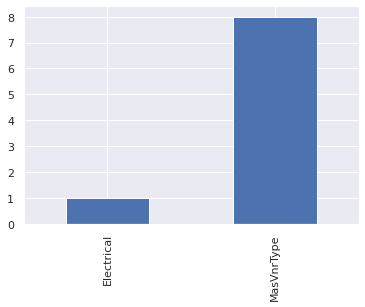

In [35]:
missing = train_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [36]:
train_df['KitchenQual'] = train_df['KitchenQual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1})

In [37]:
train_df['FireplaceQu'] = train_df['FireplaceQu'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, 'None': 0})

In [38]:
train_df['PoolQC'] = train_df['PoolQC'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'None': 0})

<AxesSubplot:>

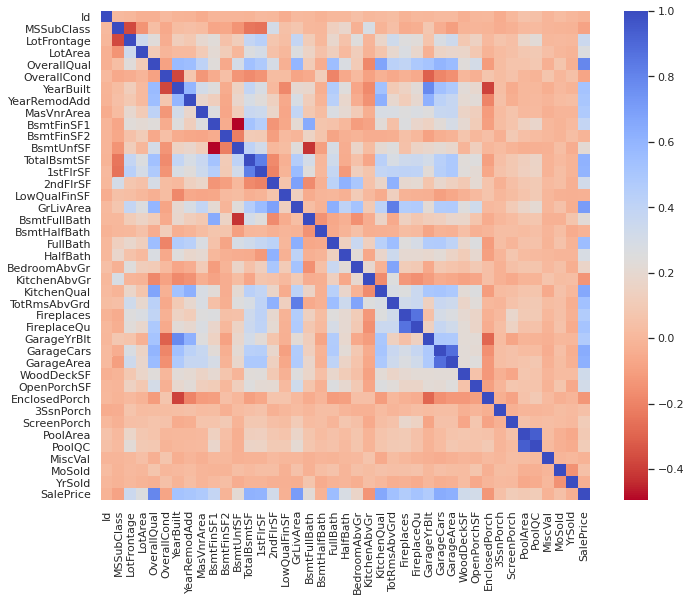

In [39]:
corrmat = train_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True,cmap = 'coolwarm_r')

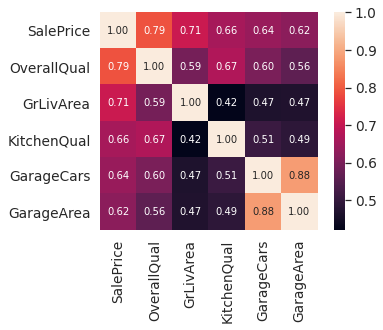

In [40]:
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
top_features = list(cols.values)

In [41]:
top_features

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'KitchenQual',
 'GarageCars',
 'GarageArea']

In [42]:
length = len(top_features)
middle_index = length//2

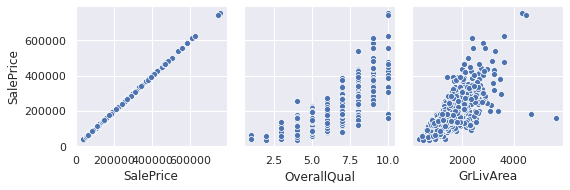

In [43]:
sns.set()
sns.pairplot(train_df, y_vars=['SalePrice'], x_vars=top_features[:middle_index], height = 2.5)
plt.show()

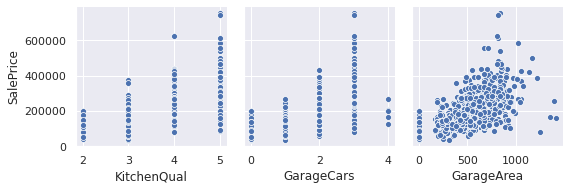

In [44]:
sns.set()
sns.pairplot(train_df, y_vars=['SalePrice'], x_vars=top_features[middle_index:], height = 2.5)
plt.show()

In [45]:
train_df_edited = train_df[top_features]

In [46]:
top_features.remove('SalePrice')

In [47]:
X = train_df_edited[top_features].values

In [48]:
y = train_df_edited['SalePrice'].values

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 5)
(292, 5)
(1168,)
(292,)


In [51]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [52]:
#To retrieve the intercept:
print(regressor.intercept_)

-134779.8743595768


In [53]:
coeff_parameter = pd.DataFrame(regressor.coef_,train_df_edited.drop(['SalePrice'], axis=1).columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
OverallQual,20612.917633
GrLivArea,52.820765
KitchenQual,21891.420084
GarageCars,2048.457345
GarageArea,62.525596


In [54]:
y_pred = regressor.predict(X_test)

In [55]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,200624,221775.418575
1,133000,133086.238996
2,110000,143451.241483
3,192000,217660.736652
4,88000,130807.381666
...,...,...
287,324000,242159.563538
288,555000,355844.452279
289,136000,225442.549945
290,82500,28851.737865


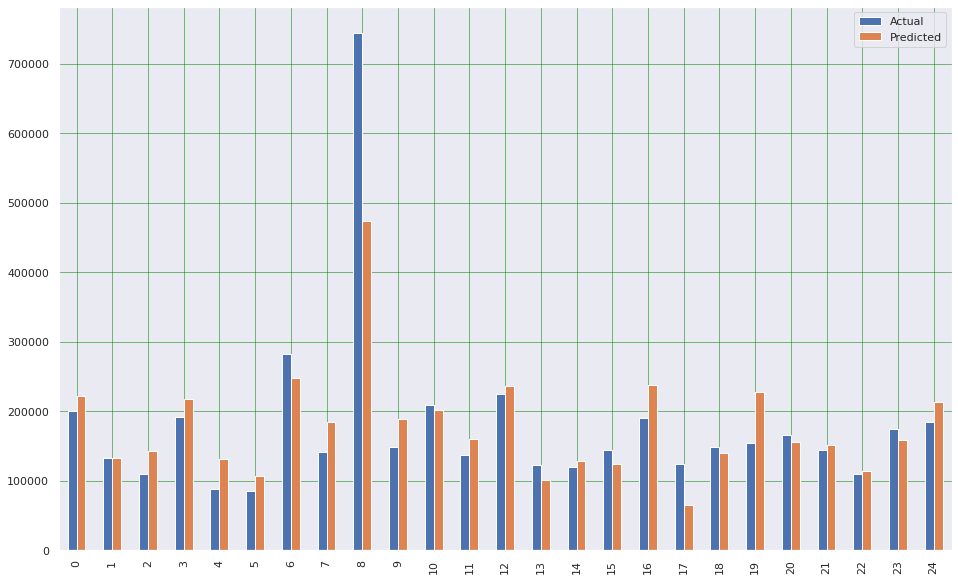

In [56]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [57]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 27360.677186202996
Mean Squared Error: 2097343789.651097
Root Mean Squared Error: 45796.766148398485


In [58]:
mean

180921.19589041095

In [59]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred)) / mean 
## 1 0.28036760703424696
## 5 0.2531310160924366
## 10 0.27246480237615506
## 15 0.27210184481333494

0.2531310160924366

<AxesSubplot:>

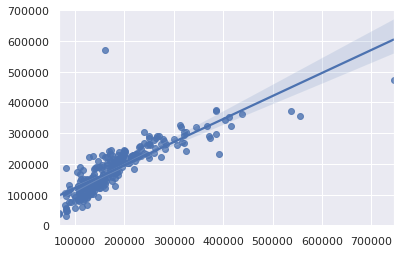

In [60]:
sns.regplot(y_test,y_pred)

In [61]:
y_pred = regressor.predict(X_test)


In [62]:
import pickle

In [63]:
with open('house_trained_model.pkl', 'wb') as f:
    pickle.dump(regressor, f)

In [64]:
import pickle
filename = 'house_trained_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [65]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.6962946196944029


In [66]:
X_test.shape

(292, 5)